# Nama  : Diky Dwicandra
# Nim   : 2109106038
# Kelas : A2 2021

## POSTTEST 6

### Import Library

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

### Import Dataset

In [159]:
warnings.filterwarnings('ignore')
datasplit = pd.read_csv("healthcare-dataset-stroke-data.csv")
datasplit.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Data Cleaning

In [160]:
datasplit.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [161]:
datasplit[datasplit.isnull().any(axis = 1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [162]:
datasplit['bmi'] = datasplit['bmi'].fillna(datasplit['bmi'].mode()[0])

In [163]:
datasplit.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [164]:
print("Banyak Nilai Duplikat = ",datasplit.duplicated().sum())

Banyak Nilai Duplikat =  0


### Data Scaling dan Pembuatan Subset

In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
df_subset = datasplit[['age', 'avg_glucose_level']]

In [167]:
ss = StandardScaler()

In [168]:
x_scaled = ss.fit_transform(df_subset)

### K-MEANS

In [169]:
from sklearn.cluster import KMeans

In [170]:
model_kmeans = KMeans(n_clusters = 3, random_state = 0)

In [171]:
model_kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [172]:
labels = model_kmeans.labels_
labels

array([1, 1, 2, ..., 0, 1, 2])

### Evaluasi K-Means debgan Cross Tab

In [173]:
df_kmeans = pd.DataFrame({'labels' : labels, 'Gender' : datasplit.gender})


In [174]:
crosstab = pd.crosstab(df_kmeans['labels'], df_kmeans['Gender'])
crosstab

Gender,Female,Male,Other
labels,,,
0,1241,859,1
1,370,331,0
2,1383,925,0


### Menampilkan Centroid Tiap Cluster

In [175]:
import matplotlib.pyplot as plt

In [176]:
xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

In [177]:
centroids = model_kmeans.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

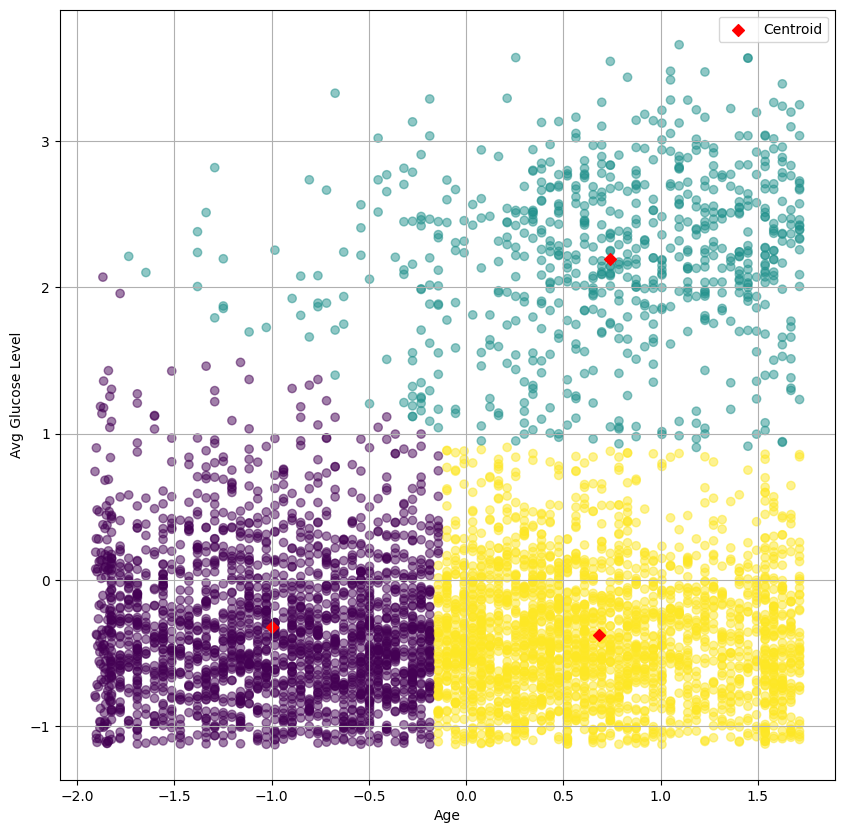

In [178]:
plt.figure(figsize = (10, 10))
plt.scatter(xs, ys, c = labels, alpha = 0.5)
plt.scatter(centroids_x, centroids_y, c = "red", marker= "D", label = "Centroid")
plt.xlabel("Age")
plt.ylabel("Avg Glucose Level")
plt.grid(True)
plt.legend()
plt.show()

### Menentukan Jumlah Cluster (Elbow Method)

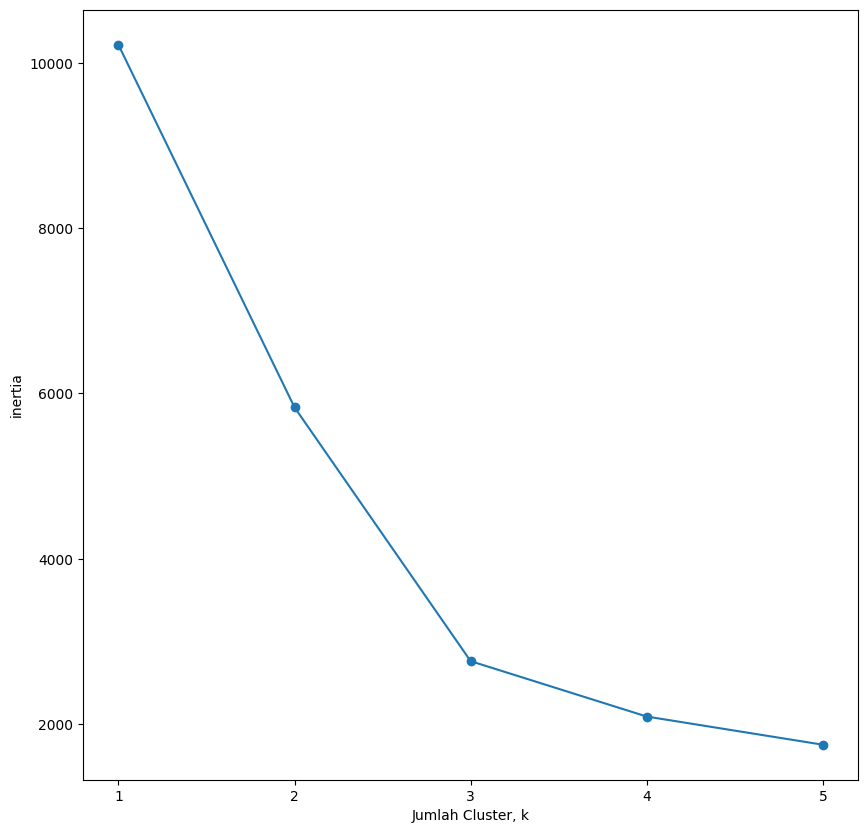

In [179]:
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

### Tamat

### Terima Kaisih